## This exercise outlines the entire data wrangling process

### Gather

In [1]:
import zipfile
import pandas as pd

In [2]:
# Extract all contents from zip file
with zipfile.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
# Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('online-job-postings.csv')

### Assess

#### Visual assessment

In [4]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


##### issues
- missing values (NaN)
- start date inconsistencies

#### Programmatic Assessment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [6]:
df.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

In [7]:
df.value_counts()

Series([], dtype: int64)

- Fix nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

In [8]:
df.StartDate.unique()

array([nan, 'Immediately', '27 April 2004', ...,
       'On/ about 06 March 2015 - 07 June 2016', '21 December 2015',
       '18 January 2016'], dtype=object)

#### More problems with our Dataset
Duplicate representation of ear and month data. For tidy, we need oneday, one month and one year so if we can update the data in one place.

Two types of observational units in this dataset: job posting data and company data. To make this tidy, we would have two tables: Job Posting data with everything except the AboutC and then a second Company table with only the company column and an About Company column.

### Clean

#### Define
- Select all records in the StartDatecolumn that have varying values, and replace them with "ASAP"

- Select all Nondescriptive and misspelled column headers, and replace them with full words/ more descriptive words.

> we will not bother with replacing the NaN values because of the nature of the dataset.

> we don't want spaces in the column headers because we can't access columns using dot notation in pandas.

#### Programmatic cleaning

#### Issue 1

#### Define
- Select all Nondescriptive and misspelled column headers, and replace them with full words/ more descriptive words."

#### Code

In [9]:
df_clean = df.copy()

In [11]:
df_clean = df.rename(columns = {'ApplicationP' : 'ApplicationProcedure',
                                'AboutC' : 'AboutCompany',
                                'RequiredQual' : 'RequiredQualifications',
                                'JobRequirment' : 'JobRequirement'})

#### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirement          16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

#### Issue 2

#### Define

- Select all records in the StartDatecolumn that have varying values, and replace them with "ASAP"

#### Code

In [15]:
df_clean.StartDate.unique()

array([nan, 'Immediately', '27 April 2004', ...,
       'On/ about 06 March 2015 - 07 June 2016', '21 December 2015',
       '18 January 2016'], dtype=object)

In [16]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [19]:
for phrase in asap_list:
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)

#### Test

In [22]:
df_clean.StartDate.value_counts()

ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Flexible                1
11 April 2010           1
3-21 July 2006          1
07 April 2010           1
25 March 2009           1
Name: StartDate, Length: 1140, dtype: int64

In [25]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

## Extra Credit

## Analysis and Visualization

In [26]:
# Number of ASAP start dates 
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [28]:
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [29]:
asap_counts/non_empty_counts

0.7086304909560723

<AxesSubplot:ylabel='StartDate'>

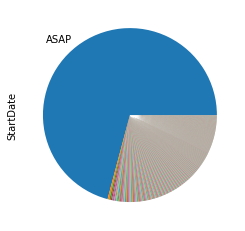

In [33]:
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels=labels)